In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Set random seed for reproducibility
np.random.seed(42)

# Define the number of samples
n_samples = 20000

# Generate base psychological traits (30 original traits)
traits = {
    'antisocial_traits': np.random.normal(0.7, 0.15, n_samples),
    'poor_impulse_control': np.random.normal(0.6, 0.15, n_samples),
    'low_self_esteem': np.random.normal(0.5, 0.15, n_samples),
    'manipulative_tendencies': np.random.normal(0.5, 0.15, n_samples),
    'aggression': np.random.normal(0.6, 0.15, n_samples),
    'social_withdrawal': np.random.normal(0.4, 0.15, n_samples),
    'childhood_trauma': np.random.normal(0.6, 0.15, n_samples),
    'emotional_instability': np.random.normal(0.6, 0.15, n_samples),
    'peer_pressure_susceptibility': np.random.normal(0.5, 0.15, n_samples),
    'risk_taking': np.random.normal(0.65, 0.15, n_samples),
    'narcissism': np.random.normal(0.5, 0.15, n_samples),
    'callous_unemotional_traits': np.random.normal(0.6, 0.15, n_samples),
    'borderline_personality_features': np.random.normal(0.55, 0.15, n_samples),
    'paranoia': np.random.normal(0.5, 0.15, n_samples),
    'cognitive_distortions': np.random.normal(0.55, 0.15, n_samples),
    'lack_of_empathy': np.random.normal(0.6, 0.15, n_samples),
    'compulsive_behavior': np.random.normal(0.5, 0.15, n_samples),
    'thrill_seeking': np.random.normal(0.6, 0.15, n_samples),
    'unrealistic_goals': np.random.normal(0.45, 0.15, n_samples),
    'blame_externalization': np.random.normal(0.5, 0.15, n_samples),
    'rationalization': np.random.normal(0.5, 0.15, n_samples),
    'lack_of_guilt': np.random.normal(0.55, 0.15, n_samples),
    'envy': np.random.normal(0.5, 0.15, n_samples),
    'need_for_power': np.random.normal(0.6, 0.15, n_samples),
    'need_for_approval': np.random.normal(0.4, 0.15, n_samples),
    'jealousy': np.random.normal(0.45, 0.15, n_samples),
    'attachment_disorder': np.random.normal(0.5, 0.15, n_samples),
    'empathy_deficit': np.random.normal(0.6, 0.15, n_samples),
    'emotional_blunting': np.random.normal(0.55, 0.15, n_samples),
    'passive_aggression': np.random.normal(0.45, 0.15, n_samples),
}

# Create correlated features manually
traits['impulsivity'] = 0.8 * traits['poor_impulse_control'] + 0.2 * np.random.normal(0.5, 0.1, n_samples)
traits['emotional_dysregulation'] = 0.6 * traits['emotional_instability'] + 0.4 * np.random.normal(0.5, 0.1, n_samples)
traits['detachment'] = 0.6 * traits['social_withdrawal'] + 0.4 * traits['attachment_disorder']
traits['aggression_violence'] = 0.7 * traits['aggression'] + 0.3 * traits['thrill_seeking']

# Demographic features
traits['age'] = np.random.randint(18, 60, n_samples)
traits['education_level'] = np.random.randint(1, 6, n_samples)  # 1=No schooling, 5=Higher Education
traits['employment_status'] = np.random.binomial(1, 0.7, n_samples)  # 1=Employed

# Combine into dataframe
df = pd.DataFrame(traits)

# Define a synthetic crime probability based on a weighted sum of important features
weights = {
    'antisocial_traits': 0.9,
    'aggression_violence': 0.8,
    'childhood_trauma': 0.6,
    'poor_impulse_control': 0.7,
    'lack_of_empathy': 0.65,
    'risk_taking': 0.6,
    'impulsivity': 0.6,
    'callous_unemotional_traits': 0.5,
    'peer_pressure_susceptibility': 0.4,
    'detachment': 0.4,
    'blame_externalization': 0.4,
    'emotional_dysregulation': 0.5,
    'thrill_seeking': 0.4,
    'age': -0.01,
    'education_level': -0.15,
    'employment_status': -0.3
}

# Compute crime probability
crime_score = np.zeros(n_samples)
for feature, weight in weights.items():
    crime_score += df[feature] * weight

# Normalize and add noise
crime_score = (crime_score - crime_score.min()) / (crime_score.max() - crime_score.min())
crime_score += np.random.normal(0, 0.05, n_samples)
crime_score = np.clip(crime_score, 0, 1)

# Generate binary target based on threshold
df['crime'] = (crime_score > 0.5).astype(int)

# Train a quick RandomForest to check baseline accuracy
X = df.drop(columns='crime')
y = df['crime']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

df.shape, df['crime'].value_counts(), accuracy


((20000, 38),
 crime
 1    10715
 0     9285
 Name: count, dtype: int64,
 0.8485)


🔍 Model: LogReg
Accuracy: 0.8995, AUC: 0.9675
              precision    recall  f1-score   support

           0       0.90      0.89      0.89      1857
           1       0.90      0.91      0.91      2143

    accuracy                           0.90      4000
   macro avg       0.90      0.90      0.90      4000
weighted avg       0.90      0.90      0.90      4000


🔍 Model: RandomForest
Accuracy: 0.8407, AUC: 0.9252
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1857
           1       0.84      0.86      0.85      2143

    accuracy                           0.84      4000
   macro avg       0.84      0.84      0.84      4000
weighted avg       0.84      0.84      0.84      4000



c:\Users\vsail\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:01:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



🔍 Model: XGBoost
Accuracy: 0.8732, AUC: 0.9511
              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1857
           1       0.87      0.90      0.88      2143

    accuracy                           0.87      4000
   macro avg       0.87      0.87      0.87      4000
weighted avg       0.87      0.87      0.87      4000


🔍 Model: SVM
Accuracy: 0.8832, AUC: 0.9563
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1857
           1       0.89      0.89      0.89      2143

    accuracy                           0.88      4000
   macro avg       0.88      0.88      0.88      4000
weighted avg       0.88      0.88      0.88      4000



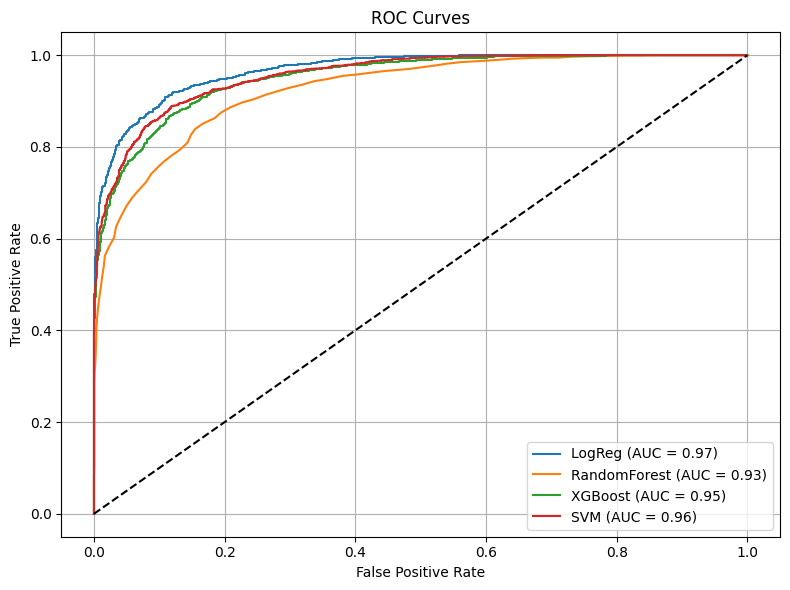

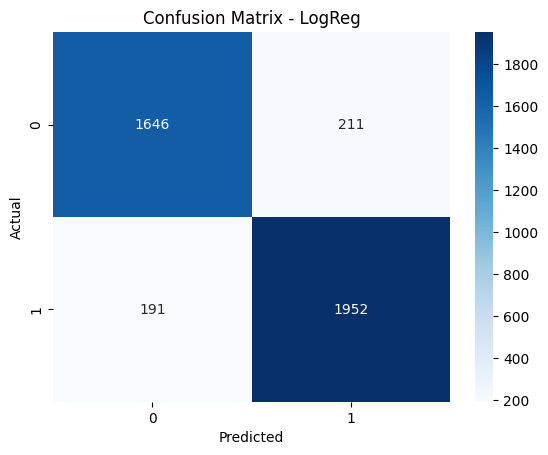

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------------------
# Load Data
# ----------------------------
df = df.copy()  # Use the previously generated DataFrame

# ----------------------------
# Preprocessing
# ----------------------------
X = df.drop('crime', axis=1)
y = df['crime']

# Categorical and numeric columns
categorical = ['education_level', 'employment_status']
numerical = [col for col in X.columns if col not in categorical]

# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical),
    ('cat', OneHotEncoder(drop='first'), categorical)
])

# ----------------------------
# Split Data
# ----------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# ----------------------------
# Model Definitions
# ----------------------------
models = {
    'LogReg': LogisticRegression(max_iter=1000),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'SVM': SVC(probability=True)
}

# ----------------------------
# Train & Evaluate Each Model
# ----------------------------
results = {}

for name, model in models.items():
    pipe = Pipeline([
        ('pre', preprocessor),
        ('clf', model)
    ])
    
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    y_proba = pipe.predict_proba(X_test)[:, 1]
    
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    
    results[name] = {
        'model': pipe,
        'accuracy': acc,
        'auc': auc,
        'report': classification_report(y_test, y_pred, output_dict=True),
        'cm': confusion_matrix(y_test, y_pred),
        'fpr': roc_curve(y_test, y_proba)[0],
        'tpr': roc_curve(y_test, y_proba)[1],
    }
    
    print(f"\n🔍 Model: {name}")
    print(f"Accuracy: {acc:.4f}, AUC: {auc:.4f}")
    print(classification_report(y_test, y_pred))

# ----------------------------
# Compare ROC Curves
# ----------------------------
plt.figure(figsize=(8, 6))
for name, res in results.items():
    plt.plot(res['fpr'], res['tpr'], label=f"{name} (AUC = {res['auc']:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# ----------------------------
# Confusion Matrix for Best Model (e.g., XGBoost)
# ----------------------------
best_model = max(results.items(), key=lambda x: x[1]['accuracy'])[0]
sns.heatmap(results[best_model]['cm'], annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix - {best_model}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


c:\Users\vsail\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:29:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\vsail\AppData\Local\Temp\ipykernel_26900\718750331.py:13: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test, plot_type="bar")


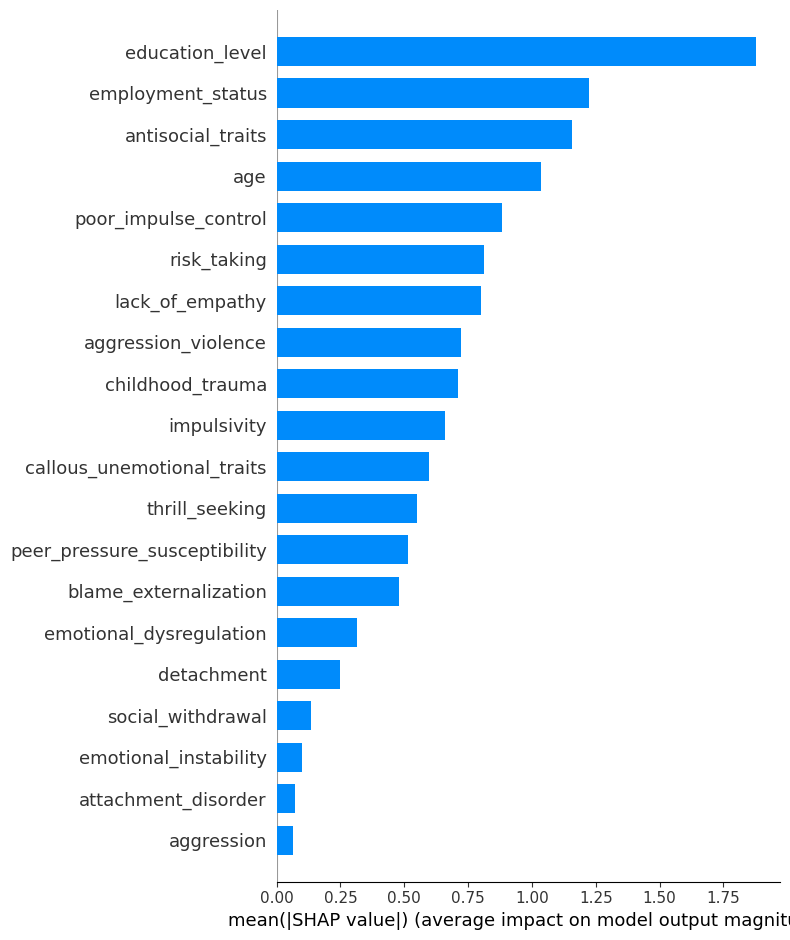

C:\Users\vsail\AppData\Local\Temp\ipykernel_26900\718750331.py:14: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test)


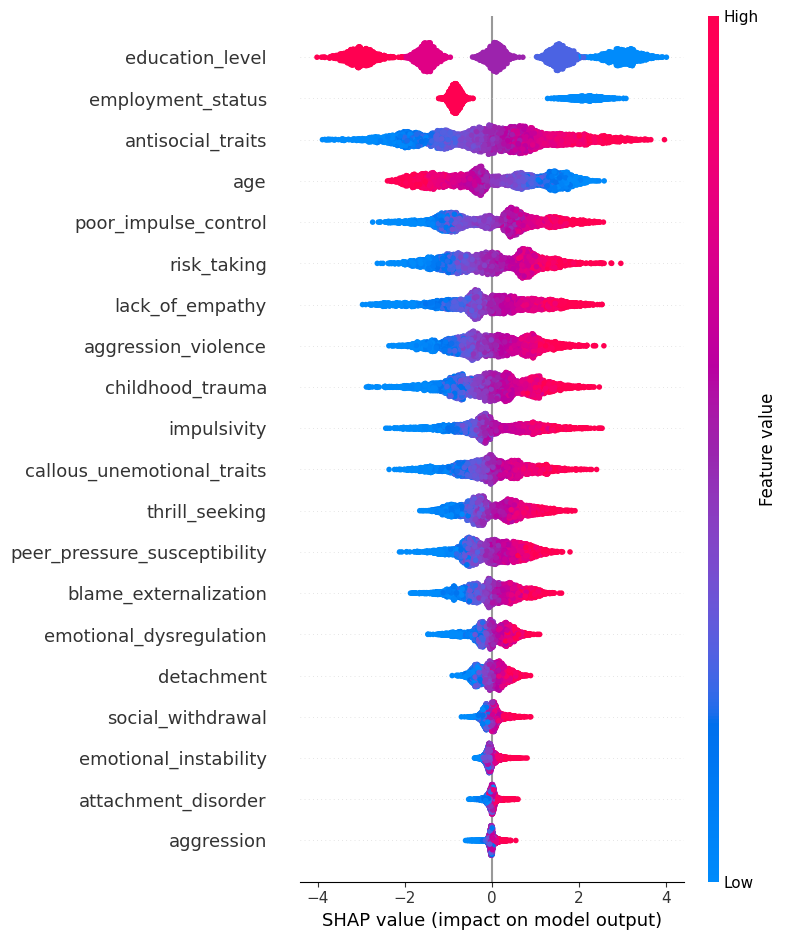

In [29]:
import shap
import xgboost as xgb

# Train XGBoost
model = xgb.XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# SHAP Tree Explainer (best for XGBoost)
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

# Plot SHAP summary
shap.summary_plot(shap_values, X_test, plot_type="bar")
shap.summary_plot(shap_values, X_test)


In [30]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

# Split your data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost handles feature scaling internally – no StandardScaler needed

# Train XGBoost model
xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=4,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
xgb_model.fit(X_train, y_train)


c:\Users\vsail\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:30:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

Classification Report:
{'0': {'precision': 0.8813104189044039, 'recall': 0.8696343402225755, 'f1-score': 0.875433448919712, 'support': 1887.0}, '1': {'precision': 0.8849391955098223, 'recall': 0.8954093705631803, 'f1-score': 0.8901434956480828, 'support': 2113.0}, 'accuracy': 0.88325, 'macro avg': {'precision': 0.8831248072071131, 'recall': 0.8825218553928779, 'f1-score': 0.8827884722838975, 'support': 4000.0}, 'weighted avg': {'precision': 0.8832273201462161, 'recall': 0.88325, 'f1-score': 0.8832040311039738, 'support': 4000.0}}

AUC Score: 0.9568249243648036


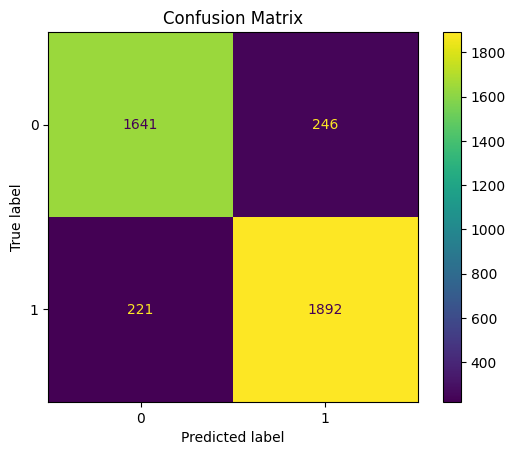

In [32]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import joblib
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

# Load and prepare your data
# X, y = ...
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = XGBClassifier()
model.fit(X_train, y_train)

# Save the model
joblib.dump(model, "artifacts/xgb_model.pkl")

# === Model Evaluation ===
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

report = classification_report(y_test, y_pred, output_dict=True)
auc = roc_auc_score(y_test, y_proba)

# Print to console or use in notebook
print("Classification Report:")
print(report)
print("\nAUC Score:", auc)

# Show Confusion Matrix
fig_cm, ax_cm = plt.subplots()
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax_cm)
plt.title("Confusion Matrix")
plt.show()


In [31]:
import joblib
import os

os.makedirs("artifacts", exist_ok=True)
joblib.dump(xgb_model, "artifacts/xgb_model.pkl")


['artifacts/xgb_model.pkl']

In [45]:
import joblib
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

# Assuming you already have 'df' with features and target 'y'
X = df.drop("crime", axis=1)
y = df["crime"]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = XGBClassifier()
model.fit(X_train, y_train)

# Save model
joblib.dump(model, "artifacts/xgb_model.pkl")

# Save the data (IMPORTANT: Save DataFrames with column names)
joblib.dump(X, "artifacts/X.pkl")
joblib.dump(X_test, "artifacts/X_test.pkl")
joblib.dump(y_test, "artifacts/y_test.pkl")


['artifacts/y_test.pkl']